## Flows of Knowledge - Research and Teaching

We will be using the created vectors to analyse the relationship between research and teaching. 

### load vectors

because of the super long process of generating these vectors, we will use random vectors for the time being. 

In [1]:
import csv
import json
import operator

In [2]:
import numpy as np

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    return d

In [4]:
#job_cities = read_vectors("../saved_data_structures/jobs_vectors_cities.txt")

In [5]:
#job_orgs = read_vectors("../saved_data_structures/jobs_vectors_orgs.txt")

In [6]:
research_cities = read_vectors("../saved_data_structures/research_vectors_cities_cleaned.txt")

In [7]:
research_orgs = read_vectors("../saved_data_structures/research_vectors_orgs_cleaned.txt")

In [8]:
teaching_cities = read_vectors("../saved_data_structures/teaching_vectors_cities_cleaned.txt")

In [9]:
teaching_orgs = read_vectors("../saved_data_structures/teaching_vectors_orgs_cleaned.txt")

In [10]:
# len(research_orgs), len(teaching_orgs), len(job_orgs), len(research_cities), len(teaching_cities), len(job_cities)

In [11]:
def count_entities(vectors, min_papers=100, kind=""):
    count = 0
    for vec in vectors:
        if vectors[vec][2] > min_papers and kind in vec.lower():
            print(vec.lower(), vectors[vec][2])
            count += 1
    return count
    

### matching names

We now have research, jobs, and teaching vectors. We want to match the strings of the names so we can easily analyse within each of the domains.

In [12]:
import re
from fuzzywuzzy import fuzz

In [13]:
import string

In [14]:
def convertabrv(entity, city=False):
    """
    converts uni/city into non abbreviated form.
    """
    stop_words = ['of', 'the', 'at', 'and']
    replace = {'univ':'university', 'res':'research', 'med':'medical', 'coll':'college', 'ctr':'center', 'jr':'junior',
               'inst':'institute', 'nat':'natural', 'htlh':'health', 'calif':'california', 'sci':'science', 'adv':'advanced',
               'ut':'university texas', 'n':'north', 's':'south', 'e': 'east', 'w': 'west', 'natl':'national',
               'uc':'university california', 'pk':'park', 'ft':'fort', 'so':'southern', 'no':'northern', 'syst':'system',
               'technol':'technology', 'penn':'pennsylvania', 'hosp':'hospital', 'clin':'clinic', 'mt':'mount',
               'biomed':'biomedical', 'canc':'cancer', 'nw':'northwestern', 'cuny':'city university new york',
                'suny':'state university new york', 'unc':'university north carolina', 'mit':'massachusetts institute technology',
               'caltech':'california institute technology', 'gen':'general', 'nyu':'new york university',
               'iit':'illionis institute technology', 'inc':'incorporated', 'fdn':'foundation'}
    stop_chars = ['-']
    remove_chars = ['&']
    entity_ = entity.lower()
    
    for chars in stop_chars:
        entity_ = entity_.replace(chars, " ")
    
    for chars in remove_chars:
        entity_ = entity_.replace(chars, "")
    
    for word in replace:
        entity_ = re.sub(r'\b%s\b' % word, replace[word], entity_)
    
    for word in stop_words:
        entity_ = re.sub(r'\b%s\b' % word, " ", entity_)
    
    entity_ = entity_.strip()
    entity_ = re.sub(' +', ' ', entity_)
    
    if city:
        return(string.capwords(entity_))
    
    return entity_

In [15]:
# for teach_org in list(teaching_orgs.keys()):
#    teach_entity = convertabrv(teach_org)
#    ks = {}
#    for research_org in list(research_orgs.keys()):
#        research_entity = convertabrv(research_org)
#        sim = fuzz.token_sort_ratio(teach_entity, research_entity)
#        ks[research_org] = sim
#    sorted_ = sorted(ks.items(), key=operator.itemgetter(1))[-1]
#    teaching_to_research[teach_org] = sorted_

#### Sanity check

Especially with the research to teaching matching, there seems to be a lot of universities missing. While conducting the matching, we will run some experiments to see if some universities are missing.

missing from teaching - NYU, UPenn, Uminnesota, MD Anderson, Penn State, Boston University, uni virgnia, northeastern (boston), UT Houston, Dallas health center, montana - missoula, Ohio University



In [16]:
research_orgs['Georgia Tech'][0] = (np.array(research_orgs['Georgia Tech'][0]) + np.array(research_orgs['Georgia Inst Technol'][0])) / 2.0

In [17]:
research_orgs['Georgia Tech'][2] = (research_orgs['Georgia Tech'][2] + research_orgs['Georgia Inst Technol'][2]) 

In [18]:
del research_orgs['Georgia Inst Technol']

In [19]:
def entity_name_check(vectors, entity, papers=100, paper_check=True):
    names = []
    for vector in vectors:
        if paper_check:  
            if entity in vector and vectors[vector][2] > papers:
                names.append(vector)
        else:
            if entity in vector:
                names.append((vector, vectors[vector]))
    return names

In [20]:
# entity_name_check(teaching_orgs, "Texas A & M")

In [21]:
# entity_name_check(research_orgs, "Texas", papers=5000)

In [22]:
# entity_name_check(teaching_to_research_match, "Texas A & M", paper_check=False)

In [23]:
import json

In [24]:
with open("../saved_data_structures/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [25]:
teaching_to_research

{'Angelo State University': ['Angelo State Univ', 100],
 'University of Mississippi': ['Univ Mississippi', 100],
 'Tufts University': ['Tufts Univ', 100],
 'Foothill College': ['Foothill Coll', 100],
 'University of Georgia': ['Univ Georgia', 100],
 'Kean University': ['Kean Univ', 100],
 'Jackson College': ['Jackson Coll', 100],
 'The University of Alabama': ['Univ Alabama', 100],
 'Lansing Community College': ['Lansing Community Coll', 100],
 'New Mexico Junior College': ['NE Jr Coll', 81],
 'University of West Georgia': ['West Georgia Univ', 100],
 'Park University': ['Park Univ', 100],
 'Stephen F Austin State University': ['Stephen F Austin State Univ', 100],
 'Excelsior College': ['Excelsior Coll', 100],
 'Galveston College': ['Galveston Coll', 100],
 'North Seattle College': ['North Seattle Comm Coll', 89],
 'Houston Community College': ['Houston Community Coll', 100],
 'Texas A & M University-Commerce': ['Texas A& M Univ Commerce', 100],
 'University of Maryland-College Park': 

In [26]:
teaching_to_research_match = {}

In [27]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [28]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'

In [29]:
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'

In [30]:
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'

In [31]:
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'

In [32]:
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'

In [33]:
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'

In [34]:
len(teaching_to_research_match)

1583

In [35]:
research_to_teaching_match = dict((v, k) for k, v in teaching_to_research_match.items())

### angles

Our vectors come with three different kinds of information - the mean, the variance, and the number of articles used to create these metrics. One basic tool of analysis we can use is to create angles of difference to measure similarities. This section will contain methods to generate these angles, as well as functions to find most and least similar institutions. 

In [36]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [37]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    if v1 is None or v2 is None:
        return (None, None)
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958 , cos

In [38]:
def find_similar(name, dictionary, n=5, reverse=False):
    angles = {}
    for entity in dictionary:
        if entity != name:
            angles[entity] = round(angle_between(dictionary[entity][0], dictionary[name][0])[0], 3)
    
    sorted_n = sorted(angles.items(), key=operator.itemgetter(1))
    if not reverse:
        return(sorted_n[0:n])
    if reverse:
        sorted_n.reverse()
        return(sorted_n[0:n])

In [39]:
find_similar("Chicago", research_cities, n=10)

[('New York', 3.982),
 ('Philadelphia', 4.595),
 ('Los Angeles', 4.663),
 ('Pittsburgh', 4.825),
 ('Durham', 5.295),
 ('St Louis', 5.348),
 ('Iowa City', 5.662),
 ('Milwaukee', 5.945),
 ('New Haven', 5.978),
 ('Baltimore', 6.006)]

In [40]:
find_similar("Univ Chicago", research_orgs, n=10)

[('Univ Virginia', 6.973),
 ('Stanford Univ', 6.974),
 ('Univ Michigan', 7.263),
 ('Indiana Univ', 7.827),
 ('Yale Univ', 8.0),
 ('Univ Calif Los Angeles', 8.004),
 ('Univ Calif Irvine', 8.233),
 ('Ohio State Univ', 8.34),
 ('Univ Rochester', 8.367),
 ('Univ Utah', 8.429)]

## visualisation tools

We will use the angles and vectors to create visualisations to better understand how the cities or institutions relate.

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def create_heatmap(matrix, names_0, names_1, kind, title="HEATMAP", figsize=(7, 7)):
    angles = np.zeros((len(names_0), len(names_1)))
    for i, name_0 in enumerate(names_0):
        for j, name_1 in enumerate(names_1):
            if name_0 is not name_1:
                angles[i][j] = np.around(eval(matrix[repr((name_0, name_1))])[kind], decimals=1)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(angles)
    
    ax.set_xticks(np.arange(len(names_0)))
    ax.set_yticks(np.arange(len(names_1)))
    
    ax.set_xticklabels(names_0)
    ax.set_yticklabels(names_1)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    for i in range(len(names_0)):
        for j in range(len(names_1)):
            text = ax.text(j, i, angles[i, j], ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    

In [43]:
names_0 = []
names_1 = []

In [44]:
with open('../saved_data_structures/org_angles_between.txt', 'r') as file:
    org_angles_between = (json.load(file))

In [45]:
names = list(org_angles_between.keys())

In [46]:
names_0, names_1 = [], []
for name_ in random.sample(names, 7):
    name_0, name_1 = eval(name_)
    names_0.append(name_0)
    names_1.append(name_1)

In [47]:
names_1.append('Harvard University')

In [48]:
names_1.append('University of Chicago')

In [49]:
names_1.append('Rice University')

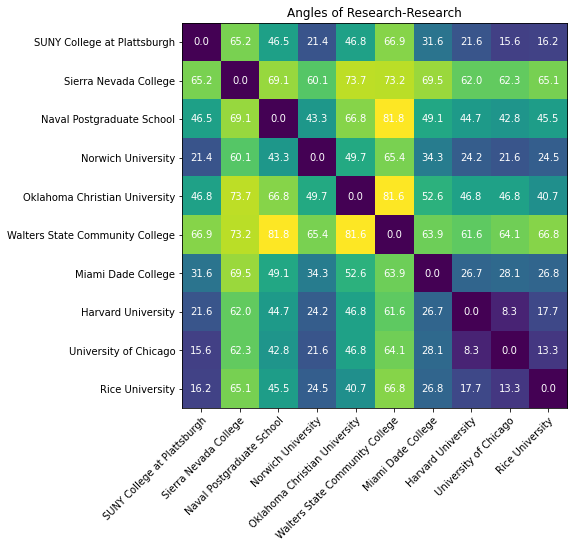

In [50]:
create_heatmap(org_angles_between, names_1, names_1, 0, "Angles of Research-Research", figsize=(8, 8))

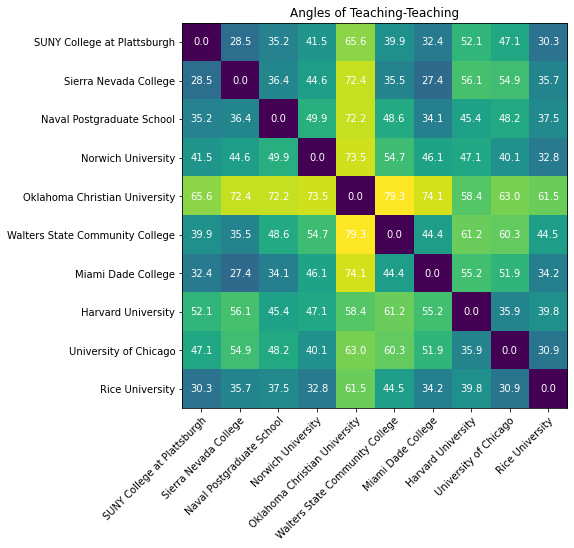

In [51]:
create_heatmap(org_angles_between, names_1, names_1, 3, "Angles of Teaching-Teaching", figsize=(8, 8))

### tier information

We will load tiers so that we can use them to cluster and do tier analysis.

In [52]:
with open('../saved_data_structures/tiers.txt') as json_file:
    tiers = json.load(json_file)

In [53]:
tiers['1'].append('Harvard University')

In [54]:
with open('../saved_data_structures/tiers_research.txt') as json_file:
    tiers_research = json.load(json_file)

### clustering

We will use the vectors to then cluster and visualise these clusters. 

In [55]:
from scipy.cluster.vq import kmeans, vq

In [56]:
no_clusters = 7

In [57]:
def create_clusters_scipy(vector_dict, no_clusters, min_docs=100):
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    centroids, _ = kmeans(vectors, no_clusters)
    doc_clusters, _ = vq(vectors, centroids)
    doc_labels = list(zip(names, doc_clusters))
    return doc_labels

In [58]:
def in_cluster(entity_labels, label_no):
    entities = []
    for item_ in entity_labels:
        entity, label = item_
        if label == label_no:
            entities.append(entity)
    return entities
    

In [59]:
clustered_research_orgs = create_clusters_scipy(research_orgs, no_clusters, min_docs=2500)

In [60]:
for i in range(0, 7):
    clust = in_cluster(clustered_research_orgs, i)
    print(len(clust), clust[0:20])

81 ['Rutgers State Univ', 'Penn State Univ', 'Univ Houston', 'Univ Toledo', 'Iowa State Univ', 'San Diego State Univ', 'Univ Wisconsin', 'Univ Florida', 'Texas A&M Univ', 'N Carolina State Univ', 'Miami Univ', 'Cornell Univ', 'SUNY Stony Brook', 'Louisiana State Univ', 'Purdue Univ', 'Florida Int Univ', 'Univ Missouri', 'Wright State Univ', 'Michigan State Univ', 'Univ Illinois']
61 ['Brigham & Womens Hosp', 'Univ Pittsburgh', 'Baylor Coll Med', 'Med Univ S Carolina', 'Thomas Jefferson Univ', 'Johns Hopkins Univ Hosp', 'Wake Forest Univ', 'Childrens Hosp', 'Rush Univ', 'Loma Linda Univ', 'Mt Sinai Sch Med', 'Mayo Clin', 'Ctr Dis Control & Prevent', 'Oregon Hlth & Sci Univ', 'NHLBI', 'NIH', 'Med Coll Wisconsin', 'Albert Einstein Coll Med', 'Emory Univ', 'Univ Calif San Francisco']
14 ['Argonne Natl Lab', 'Natl Inst Stand & Technol', 'NASA', 'USN', 'Univ Calif Santa Cruz', 'Oak Ridge Natl Lab', 'NIST', 'Brookhaven Natl Lab', 'Los Alamos Natl Lab', 'CALTECH', 'Pacific NW Natl Lab', 'Lawre

In [61]:
clustered_research_cities = create_clusters_scipy(research_cities, no_clusters, min_docs=2500)

In [62]:
for i in range(0, 15):
    clust = in_cluster(clustered_research_cities, i)
    print(len(clust), clust[0:20])

44 ['University Pk', 'Normal', 'Stony Brook', 'W Lafayette', 'Dayton', 'Evanston', 'Orlando', 'Austin', 'Kent', 'Irvine', 'Tallahassee', 'San Jose', 'Cambridge', 'Storrs', 'Bloomington', 'Greensboro', 'Newark', 'Medford', 'Denton', 'Norfolk']
36 ['Ames', 'College Stn', 'Raleigh', 'Oxford', 'Ithaca', 'Baton Rouge', 'E Lansing', 'Tucson', 'Athens', 'Clemson', 'Davis', 'Riverside', 'Laramie', 'Mississippi State', 'Lincoln', 'Blacksburg', 'Knoxville', 'Boise', 'Honolulu', 'Norman']
13 ['St Paul', 'Corvallis', 'Ft Collins', 'Bozeman', 'Beltsville', 'Moscow', 'Flagstaff', 'Fairbanks', 'Woods Hole', 'Orono', 'Anchorage', 'Brookings', 'Missoula']
48 ['Washington', 'New Brunswick', 'Chicago', 'Seattle', 'Los Angeles', 'San Antonio', 'Toledo', 'Columbus', 'San Diego', 'Madison', 'Gainesville', 'Worcester', 'Durham', 'Minneapolis', 'New Orleans', 'Miami', 'Atlanta', 'Greenville', 'Columbia', 'Pittsburgh']
25 ['Berkeley', 'Argonne', 'Notre Dame', 'Urbana', 'Santa Barbara', 'Gaithersburg', 'Oak Rid

In [63]:
clustered_teaching_orgs = create_clusters_scipy(teaching_orgs, no_clusters, min_docs=1500)

In [64]:
for i in range(0, 10):
    clust = in_cluster(clustered_teaching_orgs, i)
    print(len(clust), clust[0:20])

58 ['Angelo State University', 'University of Georgia', 'University of West Georgia', 'Stephen F Austin State University', 'Texas A & M University-Commerce', 'Clemson University', 'The University of Montana', 'Western Kentucky University', 'Brigham Young University-Provo', 'University of Southern California', 'Wayne State University', 'The University of Texas at San Antonio', 'Texas A & M International University', 'The University of Texas at Tyler', 'University of Illinois at Chicago', 'University of North Carolina at Charlotte', 'Loyola University New Orleans', 'Sam Houston State University', 'Woodbury University', 'University of North Texas']
1 ['Calvin College']
37 ['Jackson College', 'Lansing Community College', 'New Mexico Junior College', 'Houston Community College', 'South Plains College', 'McLennan Community College', 'Valencia College', 'Northwest College', 'Imperial Valley College', 'University of Akron Main Campus', 'Amarillo College', 'Clark State Community College', 'Midw

In [65]:
from sklearn.cluster import KMeans

In [66]:
def sklearn_cluster(vector_dict, no_clusters, min_docs=1500):
    return it

## Visualising clusters

In [67]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [68]:
import matplotlib.pyplot as plt

In [69]:
import matplotlib._color_data as mcd
from random import sample

In [70]:
colors_20 = sample(list(mcd.CSS4_COLORS), 20)

In [71]:
uni_labels = {}

In [72]:
for tier in tiers:
    for uni in tiers[tier]:
        if uni in teaching_orgs:
            uni_labels[uni] = colors_20[int(tier) - 1]

In [73]:
def plotpca(vector_dict, dims= (0, 1), n_components=10, min_docs=100, annotate=True):
    PCA_n = PCA(n_components=n_components)
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            if name in research_to_teaching_match:
                names.append(research_to_teaching_match[name])
            else:
                names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    pca_vecs = PCA_n.fit_transform(vectors)
    fig = plt.figure(figsize= (8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_title('PCA plot')
    dim_1, dim_2 = dims
    for vec, name in zip(pca_vecs, names):
        if name in uni_labels:
            ax.scatter(vec[dim_1], vec[dim_2], c=uni_labels[name])
            if annotate:
                ax.annotate(name, (vec[dim_1], vec[dim_2]))
    plt.show()

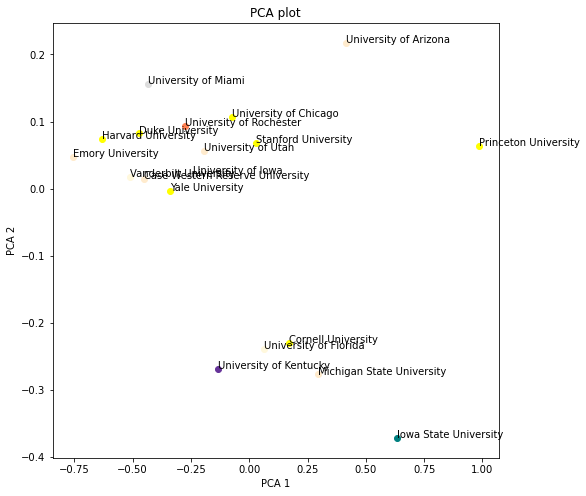

In [74]:
plotpca(research_orgs, min_docs=20000)

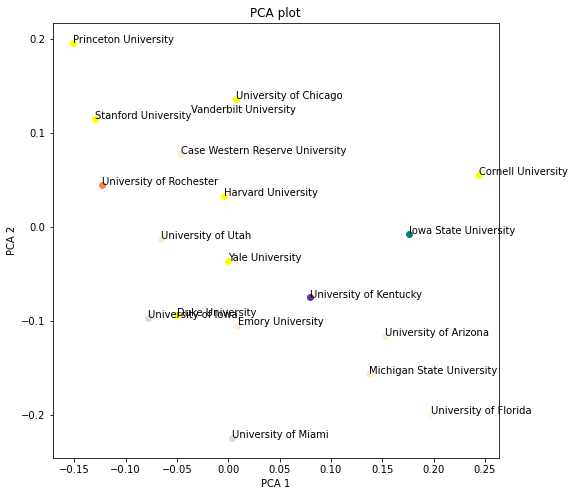

In [75]:
plotpca(research_orgs, min_docs=20000, dims=(2, 3))

### t-sne

In [76]:
def plottsne(vector_dict, dims= (0, 1), n_components=2, min_docs=500, perplexity=400, n_iter=300, annotate=True):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)    
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            if name in research_to_teaching_match:
                names.append(research_to_teaching_match[name])
            else:
                names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    tsne_vecs = tsne.fit_transform(vectors)
    fig = plt.figure(figsize= (8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('tsne 1')
    ax.set_ylabel('tsne 2')
    ax.set_title('tsne plot')
    dim_1, dim_2 = dims
    for vec, name in zip(tsne_vecs, names):
        if name in uni_labels:
            ax.scatter(vec[dim_1], vec[dim_2], c=uni_labels[name])
            if annotate:
                ax.annotate(name, (vec[dim_1], vec[dim_2]))

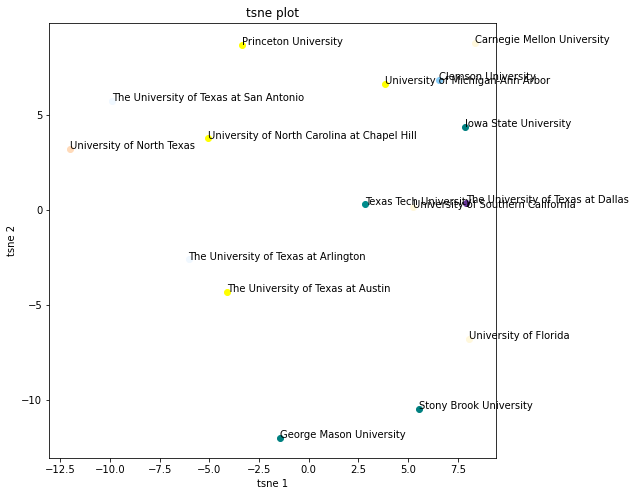

In [77]:
plottsne(teaching_orgs, min_docs=3000)

### tier-analysis

Access to tiers means we can create more fine tuned analysis within tiers to find patterns. Similarities to other universities within the tier and outside the tier.

In [78]:
def clean_uni_name(uni_name):
    # matching for peculiarities in the tiers
    # to fix - Uni Houston, Purdue, University of Pittsburgh, 
    # to fix - UMass-Amherst, UMass-Boston, Uni South Florida, Tulane, oklahoma-norman, uni of alaska
    uni_name = uni_name.replace(" - ", "-").replace(" : ", "-").replace(", ", "-").replace(" (MIT)", "").replace(".", "")
    uni_name = uni_name.replace("Columbia University", "Columbia University in the City of New York").replace("The ", "")
    uni_name = uni_name.replace("University of Colorado at Boulder", "University of Colorado Boulder")
    uni_name = uni_name.replace("University of Colorado at Denver", "University of Colorado Denver")
    uni_name = uni_name.replace("University of Texas at Austin", "The University of Texas at Austin")
    uni_name = uni_name.replace("University of Texas at Dallas", "The University of Texas at Dallas")
    uni_name = uni_name.replace("Indiana University Bloomington", "Indiana University-Bloomington")
    uni_name = uni_name.replace("University of Washington", "University of Washington-Seattle Campus")
    uni_name = uni_name.replace("Georgia Institute of Technology", "Georgia Institute of Technology-Main Campus")
    uni_name = uni_name.replace("The Ohio State University - Columbus", "Ohio State University-Main Campus")
    uni_name = uni_name.replace("Texas A&M University", "Texas A & M University-College Station")
    return(uni_name)

In [79]:
within_tier_angles_rr = {}
within_tier_angles_tt = {}
within_tier_angles_rt = {}
within_tier_angles_rt_self = {}

In [80]:
missing_unis_teaching = []

In [81]:
missing_unis_research = []

In [82]:
def get_entity_vector(entity):
    # get teaching name
    try:
        teaching_uni_1_vector = teaching_orgs[entity][0]
    except KeyError:
        teaching_uni_1_vector = None
    # get research name
    try:
        research_uni_1 = teaching_to_research_match[entity]
        research_vector_1 = research_orgs[research_uni_1][0]
    except KeyError:
        if entity == "New York University":
            research_uni_1 = "NYU"
            research_vector_1 = research_orgs[research_uni_1][0]
        if entity == "University of Pennsylvania":
            research_uni_1 = "UPenn"
            research_vector_1 = research_orgs[research_uni_1][0]
        else:
            research_vector_1 = None
    return teaching_uni_1_vector, research_vector_1

In [83]:
unis_per_tier_research = {}
unis_per_tier_teaching = {}

In [84]:
american_unis = []

In [85]:
for tier in tiers:
    for uni in tiers[tier]:
        uni_name = clean_uni_name(uni)
        if uni_name in teaching_orgs:
            american_unis.append(uni_name)

In [86]:
len(american_unis)

147

In [87]:
america_tiers = {}

In [88]:
i = 0

In [89]:
for num in range(0, 7):
    america_tiers[num] = american_unis[i:i+21]
    i += 21

In [90]:
america_tiers[0].remove('University of California-San Francisco')

In [91]:
america_tiers[0].append('Harvard University')

In [92]:
america_tiers[1].remove('Harvard University')

In [93]:
america_tiers[1].append('University of California-San Francisco')

In [94]:
america_tiers

{0: ['Stanford University',
  'Massachusetts Institute of Technology',
  'University of California-Berkeley',
  'Princeton University',
  'Columbia University in the City of New York',
  'California Institute of Technology',
  'University of Chicago',
  'University of California-Los Angeles',
  'Yale University',
  'Cornell University',
  'University of Washington-Seattle Campus',
  'Johns Hopkins University',
  'University of California-San Diego',
  'University of Michigan-Ann Arbor',
  'Washington University in St Louis',
  'University of Wisconsin-Madison',
  'Duke University',
  'Northwestern University',
  'University of North Carolina at Chapel Hill',
  'Rockefeller University',
  'Harvard University'],
 1: ['University of Colorado Boulder',
  'University of Illinois at Urbana-Champaign',
  'The University of Texas at Austin',
  'University of Maryland-College Park',
  'University of California-Santa Barbara',
  'University of Southern California',
  'Vanderbilt University',
  '

In [95]:
for tier in tiers:
    
    within_tier_angles_rr[tier] = 0
    within_tier_angles_tt[tier] = 0
    within_tier_angles_rt[tier] = 0
    within_tier_angles_rt_self[tier] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    unis_per_tier_research[tier] = []
    unis_per_tier_teaching[tier] = []
    
    for uni_1 in tiers[tier]:
        
        
        teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))
        
        if research_vector_1 is not None:
            unis_per_tier_research[tier].append(uni_1)
            
        if teaching_vector_1 is not None:
            unis_per_tier_teaching[tier].append(uni_1)
            
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_tier_angles_rt_self[tier] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching:
            missing_unis_teaching.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research:
            missing_unis_research.append(uni_1)
            
        for uni_2 in tiers[tier]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_tier_angles_rr[tier] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_tt[tier] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_rt[tier] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2

    within_tier_angles_rt_self[tier] = round(within_tier_angles_rt_self[tier] / no_checks_self, 3)
    within_tier_angles_rr[tier] = round(within_tier_angles_rr[tier] / no_checks_rr, 3)
    within_tier_angles_tt[tier] = round(within_tier_angles_tt[tier] / no_checks_tt, 3)
    within_tier_angles_rt[tier] = round(within_tier_angles_rt[tier] / no_checks_rt, 3)

In [96]:
# missing_unis_research

In [97]:
uni_tier_lens = {}
for tier in unis_per_tier_research:
    uni_tier_lens[tier] = len(unis_per_tier_research[tier])

In [98]:
uni_tier_lens

{'1': 28,
 '2': 9,
 '3': 9,
 '4': 5,
 '5': 7,
 '6': 12,
 '7': 7,
 '8': 9,
 '9': 5,
 '10': 9,
 '11': 6,
 '12': 4,
 '13': 6,
 '14': 7,
 '15': 3,
 '16': 4,
 '17': 3,
 '18': 5,
 '19': 3,
 '20': 5}

In [99]:
within_tier_angles_rr

{'1': 53.789,
 '2': 33.214,
 '3': 42.499,
 '4': 29.105,
 '5': 23.89,
 '6': 38.58,
 '7': 20.415,
 '8': 46.198,
 '9': 39.908,
 '10': 37.739,
 '11': 25.209,
 '12': 42.702,
 '13': 42.002,
 '14': 29.403,
 '15': 16.242,
 '16': 47.593,
 '17': 39.898,
 '18': 32.265,
 '19': 15.663,
 '20': 27.507}

In [100]:
np.corrcoef(np.array(list(within_tier_angles_rr.values())), np.array(list(uni_tier_lens.values())))

array([[1.        , 0.50305704],
       [0.50305704, 1.        ]])

In [101]:
within_tier_angles_tt

{'1': 29.118,
 '2': 28.999,
 '3': 33.635,
 '4': 25.468,
 '5': 23.263,
 '6': 29.535,
 '7': 30.812,
 '8': 26.573,
 '9': 28.101,
 '10': 27.583,
 '11': 21.785,
 '12': 23.524,
 '13': 32.11,
 '14': 29.216,
 '15': 25.228,
 '16': 40.377,
 '17': 21.737,
 '18': 26.466,
 '19': 25.122,
 '20': 28.759}

In [102]:
within_tier_angles_rt

{'1': 67.725,
 '2': 64.019,
 '3': 65.158,
 '4': 65.024,
 '5': 63.073,
 '6': 66.386,
 '7': 63.963,
 '8': 68.253,
 '9': 66.756,
 '10': 64.955,
 '11': 65.771,
 '12': 68.93,
 '13': 67.373,
 '14': 66.301,
 '15': 63.135,
 '16': 72.028,
 '17': 71.405,
 '18': 65.918,
 '19': 62.482,
 '20': 62.742}

In [103]:
between_tier_angles_rr = {}
between_tier_angles_tt = {}

In [104]:
for tier_1 in tiers:
    for tier_2 in tiers:
        if tier_1 == tier_2:
            continue
        between_tier_angles_rr[(tier_1, tier_2)] = 0
        between_tier_angles_tt[(tier_1, tier_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in tiers[tier_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))

            for uni_2 in tiers[tier_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_tier_angles_rr[(tier_1, tier_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_tier_angles_tt[(tier_1, tier_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                

        between_tier_angles_rr[(tier_1, tier_2)] = round(between_tier_angles_rr[(tier_1, tier_2)] / no_checks_rr, 3)
        between_tier_angles_tt[(tier_1, tier_2)] = round(between_tier_angles_tt[(tier_1, tier_2)] / no_checks_tt, 3)

In [105]:
between_tier_angles_tt

{('1', '2'): 31.681,
 ('1', '3'): 34.297,
 ('1', '4'): 30.772,
 ('1', '5'): 32.181,
 ('1', '6'): 33.371,
 ('1', '7'): 33.882,
 ('1', '8'): 31.9,
 ('1', '9'): 33.347,
 ('1', '10'): 33.451,
 ('1', '11'): 32.819,
 ('1', '12'): 34.049,
 ('1', '13'): 37.51,
 ('1', '14'): 35.06,
 ('1', '15'): 33.169,
 ('1', '16'): 42.149,
 ('1', '17'): 31.927,
 ('1', '18'): 34.632,
 ('1', '19'): 35.735,
 ('1', '20'): 33.528,
 ('2', '1'): 31.681,
 ('2', '3'): 34.805,
 ('2', '4'): 32.269,
 ('2', '5'): 31.794,
 ('2', '6'): 33.535,
 ('2', '7'): 34.423,
 ('2', '8'): 31.386,
 ('2', '9'): 34.011,
 ('2', '10'): 32.872,
 ('2', '11'): 32.174,
 ('2', '12'): 33.215,
 ('2', '13'): 37.617,
 ('2', '14'): 34.255,
 ('2', '15'): 33.005,
 ('2', '16'): 43.046,
 ('2', '17'): 32.184,
 ('2', '18'): 34.246,
 ('2', '19'): 35.363,
 ('2', '20'): 34.187,
 ('3', '1'): 34.297,
 ('3', '2'): 34.805,
 ('3', '4'): 33.933,
 ('3', '5'): 33.399,
 ('3', '6'): 34.835,
 ('3', '7'): 36.704,
 ('3', '8'): 33.489,
 ('3', '9'): 36.396,
 ('3', '10'): 34

In [106]:
between_tier_angles_rr

{('1', '2'): 46.982,
 ('1', '3'): 50.962,
 ('1', '4'): 46.206,
 ('1', '5'): 44.596,
 ('1', '6'): 49.61,
 ('1', '7'): 42.337,
 ('1', '8'): 53.719,
 ('1', '9'): 53.116,
 ('1', '10'): 49.118,
 ('1', '11'): 45.855,
 ('1', '12'): 55.756,
 ('1', '13'): 52.629,
 ('1', '14'): 46.71,
 ('1', '15'): 42.325,
 ('1', '16'): 58.27,
 ('1', '17'): 57.598,
 ('1', '18'): 49.039,
 ('1', '19'): 43.807,
 ('1', '20'): 47.028,
 ('2', '1'): 46.982,
 ('2', '3'): 41.025,
 ('2', '4'): 34.981,
 ('2', '5'): 32.593,
 ('2', '6'): 39.126,
 ('2', '7'): 30.0,
 ('2', '8'): 44.419,
 ('2', '9'): 44.01,
 ('2', '10'): 38.863,
 ('2', '11'): 33.759,
 ('2', '12'): 47.579,
 ('2', '13'): 43.849,
 ('2', '14'): 35.169,
 ('2', '15'): 29.824,
 ('2', '16'): 50.726,
 ('2', '17'): 49.738,
 ('2', '18'): 38.06,
 ('2', '19'): 31.812,
 ('2', '20'): 35.85,
 ('3', '1'): 50.962,
 ('3', '2'): 41.025,
 ('3', '4'): 40.043,
 ('3', '5'): 38.331,
 ('3', '6'): 44.056,
 ('3', '7'): 35.591,
 ('3', '8'): 48.741,
 ('3', '9'): 47.968,
 ('3', '10'): 43.459

In [107]:
within_tier_angles_rr = {}
within_tier_angles_tt = {}
within_tier_angles_rt = {}
within_tier_angles_rt_self = {}

In [108]:
missing_unis_teaching = []

In [109]:
missing_unis_research = []

In [110]:
for tier in america_tiers:
    
    within_tier_angles_rr[tier] = 0
    within_tier_angles_tt[tier] = 0
    within_tier_angles_rt[tier] = 0
    within_tier_angles_rt_self[tier] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    unis_per_tier_research[tier] = []
    unis_per_tier_teaching[tier] = []
    
    for uni_1 in america_tiers[tier]:
        
        
        teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))
        
            
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_tier_angles_rt_self[tier] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching:
            missing_unis_teaching.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research:
            missing_unis_research.append(uni_1)
            
        for uni_2 in america_tiers[tier]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_tier_angles_rr[tier] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_tt[tier] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_rt[tier] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2

    within_tier_angles_rt_self[tier] = round(within_tier_angles_rt_self[tier] / no_checks_self, 3)
    within_tier_angles_rr[tier] = round(within_tier_angles_rr[tier] / no_checks_rr, 3)
    within_tier_angles_tt[tier] = round(within_tier_angles_tt[tier] / no_checks_tt, 3)
    within_tier_angles_rt[tier] = round(within_tier_angles_rt[tier] / no_checks_rt, 3)

In [111]:
between_tier_angles_rr = {}
between_tier_angles_tt = {}

In [112]:
for tier_1 in america_tiers:
    for tier_2 in america_tiers:
        if tier_1 == tier_2:
            continue
        between_tier_angles_rr[(tier_1, tier_2)] = 0
        between_tier_angles_tt[(tier_1, tier_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in america_tiers[tier_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))

            for uni_2 in america_tiers[tier_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_tier_angles_rr[(tier_1, tier_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_tier_angles_tt[(tier_1, tier_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1
            

        between_tier_angles_rr[(tier_1, tier_2)] = round(between_tier_angles_rr[(tier_1, tier_2)] / no_checks_rr, 3)
        between_tier_angles_tt[(tier_1, tier_2)] = round(between_tier_angles_tt[(tier_1, tier_2)] / no_checks_tt, 3)

In [113]:
within_tier_angles_rr

{0: 51.045, 1: 50.341, 2: 31.588, 3: 41.636, 4: 35.314, 5: 41.158, 6: 40.222}

In [114]:
within_tier_angles_tt

{0: 28.911, 1: 34.214, 2: 28.191, 3: 31.888, 4: 29.3, 5: 32.322, 6: 36.225}

In [115]:
def avg_between_tiers(between_tiers):
    tiers = {}
    for tier in between_tiers:
        tier_1, tier_2 = tier
        if tier_1 not in tiers:
            tiers[tier_1] = 0
        if tier_1 in tiers:
            tiers[tier_1] += between_tiers[tier]
    
    for tier in tiers:
        tiers[tier] /= len(tiers)
    
    return tiers

In [116]:
avg_between_tiers(between_tier_angles_rr)

{0: 41.802571428571426,
 1: 41.28242857142857,
 2: 34.19128571428572,
 3: 37.70471428571428,
 4: 35.48285714285715,
 5: 37.553,
 6: 37.88514285714286}

In [117]:
avg_between_tiers(between_tier_angles_tt)

{0: 29.44728571428572,
 1: 30.081571428571433,
 2: 27.695285714285717,
 3: 28.908000000000005,
 4: 28.256285714285717,
 5: 29.45642857142857,
 6: 30.542571428571428}

### geographical/spatial analysis

Similar to tier analysis, how do universities relate within and outside the state?

In [118]:
reader = csv.reader(open("../saved_data_structures/state_unis.csv"))

In [119]:
states = {}

In [120]:
for k,v in reader:
    states[k] = eval(v)

In [121]:
within_state_angles_rr = {}
between_state_angles_rr = {}

within_state_angles_rt = {}
within_state_angles_rt_self = {}

within_state_angles_tt = {}
between_state_angles_tt = {}

In [122]:
missing_unis_research_states = []
missing_unis_teaching_states = []

In [123]:
for state in states:
    
    within_state_angles_rr[state] = 0
    within_state_angles_tt[state] = 0
    within_state_angles_rt[state] = 0
    within_state_angles_rt_self[state] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    for uni_1 in states[state]:
        
        teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)
        
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_state_angles_rt_self[state] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching_states:
            missing_unis_teaching_states.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research_states:
            missing_unis_research_states.append(uni_1)
            
        for uni_2 in states[state]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_state_angles_rr[state] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_state_angles_tt[state] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_state_angles_rt[state] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2
    try:
        within_state_angles_rt_self[state] = round(within_state_angles_rt_self[state] / no_checks_self, 3)
        within_state_angles_rr[state] = round(within_state_angles_rr[state] / no_checks_rr, 3)
        within_state_angles_tt[state] = round(within_state_angles_tt[state] / no_checks_tt, 3)
        within_state_angles_rt[state] = round(within_state_angles_rt[state] / no_checks_rt, 3)
    except ZeroDivisionError:
        continue


In [124]:
state_lens = {}
for state in states:
    state_lens[state] = len(states[state])
    print(state, len(states[state]))

TX 119
MS 27
MA 87
CA 217
GA 61
NJ 43
MI 67
FL 69
AL 44
NM 15
MO 53
NC 84
NY 152
OH 75
IL 102
WA 49
MD 41
SC 44
MT 10
KY 31
IA 39
LA 28
UT 13
CO 34
HI 11
OK 34
WY 7
PA 111
IN 40
AZ 23
VA 63
VT 15
WI 53
ID 11
AR 31
DC 8
TN 51
OR 35
NV 9
MN 57
NH 15
KS 44
RI 10
ME 18
WV 19
AK 5
SD 10
NE 23
ND 11
CT 31
DE 5
 1


In [125]:
import seaborn as sns

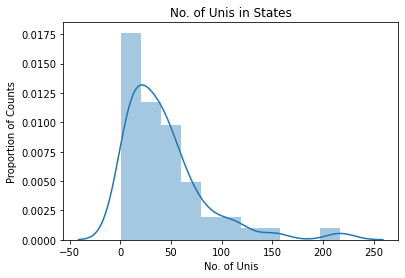

In [126]:
ax = sns.distplot(list(state_lens.values()))
ax.set(xlabel="No. of Unis", ylabel="Proportion of Counts", title="No. of Unis in States")
plt.show()

In [127]:
within_state_angles_rr

{'TX': 59.991,
 'MS': 57.463,
 'MA': 53.058,
 'CA': 59.645,
 'GA': 48.188,
 'NJ': 57.283,
 'MI': 54.481,
 'FL': 58.017,
 'AL': 49.351,
 'NM': 59.241,
 'MO': 61.031,
 'NC': 59.486,
 'NY': 54.384,
 'OH': 47.178,
 'IL': 57.064,
 'WA': 55.169,
 'MD': 58.946,
 'SC': 51.56,
 'MT': 41.245,
 'KY': 48.424,
 'IA': 51.047,
 'LA': 53.963,
 'UT': 48.952,
 'CO': 55.48,
 'HI': 49.892,
 'OK': 53.603,
 'WY': 40.185,
 'PA': 49.412,
 'IN': 46.29,
 'AZ': 56.544,
 'VA': 48.128,
 'VT': 45.368,
 'WI': 48.716,
 'ID': 47.47,
 'AR': 44.999,
 'DC': 40.039,
 'TN': 55.7,
 'OR': 49.739,
 'NV': 51.308,
 'MN': 49.14,
 'NH': 49.616,
 'KS': 50.917,
 'RI': 45.052,
 'ME': 38.45,
 'WV': 46.869,
 'AK': 14.949,
 'SD': 53.862,
 'NE': 48.169,
 'ND': 58.02,
 'CT': 47.793,
 'DE': 34.962,
 '': 0}

In [128]:
np.corrcoef(np.array(list(within_state_angles_rr.values())), np.array(list(state_lens.values())))

array([[1.        , 0.41507249],
       [0.41507249, 1.        ]])

In [129]:
np.corrcoef(np.array(list(within_state_angles_tt.values())), np.array(list(state_lens.values())))

array([[1.        , 0.35749978],
       [0.35749978, 1.        ]])

In [130]:
within_state_angles_tt

{'TX': 44.045,
 'MS': 40.895,
 'MA': 47.931,
 'CA': 44.891,
 'GA': 49.349,
 'NJ': 41.064,
 'MI': 46.286,
 'FL': 45.178,
 'AL': 51.087,
 'NM': 42.477,
 'MO': 48.177,
 'NC': 50.315,
 'NY': 48.953,
 'OH': 46.914,
 'IL': 48.749,
 'WA': 45.68,
 'MD': 43.382,
 'SC': 50.455,
 'MT': 43.787,
 'KY': 46.077,
 'IA': 51.026,
 'LA': 47.226,
 'UT': 36.198,
 'CO': 45.573,
 'HI': 44.649,
 'OK': 46.189,
 'WY': 28.461,
 'PA': 47.31,
 'IN': 43.288,
 'AZ': 48.368,
 'VA': 45.315,
 'VT': 45.873,
 'WI': 48.532,
 'ID': 39.135,
 'AR': 48.085,
 'DC': 33.647,
 'TN': 46.381,
 'OR': 47.739,
 'NV': 25.763,
 'MN': 48.884,
 'NH': 45.802,
 'KS': 50.089,
 'RI': 36.359,
 'ME': 47.037,
 'WV': 48.126,
 'AK': 38.289,
 'SD': 37.626,
 'NE': 49.078,
 'ND': 47.751,
 'CT': 47.612,
 'DE': 36.873,
 '': 0}

In [131]:
for state_1 in states:
    for state_2 in states:
        if state_1 == state_2:
            continue
        between_state_angles_rr[(state_1, state_2)] = 0
        between_state_angles_tt[(state_1, state_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in states[state_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)

            for uni_2 in states[state_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_state_angles_rr[(state_1, state_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_state_angles_tt[(state_1, state_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                
        try:
            between_state_angles_rr[(state_1, state_2)] = round(between_state_angles_rr[(state_1, state_2)] / no_checks_rr, 3)
            between_state_angles_tt[(state_1, state_2)] = round(between_state_angles_tt[(state_1, state_2)] / no_checks_tt, 3)
        except ZeroDivisionError:
            continue

In [132]:
avg_angle_between_rr = 0
avg_angle_between_tt = 0

In [133]:
avg_between_tiers(between_state_angles_rr)

{'TX': 55.63792307692306,
 'MS': 56.298942307692315,
 'MA': 52.50505769230771,
 'CA': 55.32246153846154,
 'GA': 50.24534615384614,
 'NJ': 54.72859615384617,
 'MI': 52.9698076923077,
 'FL': 54.770230769230764,
 'AL': 50.987173076923064,
 'NM': 59.94465384615384,
 'MO': 56.66259615384616,
 'NC': 55.86284615384614,
 'NY': 52.819384615384635,
 'OH': 49.70007692307692,
 'IL': 54.23136538461537,
 'WA': 53.503576923076935,
 'MD': 55.64990384615385,
 'SC': 52.03090384615386,
 'MT': 50.192423076923085,
 'KY': 50.83542307692308,
 'IA': 51.80596153846155,
 'LA': 53.82621153846155,
 'UT': 52.083519230769234,
 'CO': 54.10288461538461,
 'HI': 53.51776923076922,
 'OK': 53.32949999999999,
 'WY': 52.24438461538462,
 'PA': 50.558538461538475,
 'IN': 49.59425,
 'AZ': 55.95790384615385,
 'VA': 50.14053846153846,
 'VT': 50.99963461538461,
 'WI': 50.43694230769233,
 'ID': 51.57957692307691,
 'AR': 49.75032692307691,
 'DC': 49.00067307692307,
 'TN': 53.829403846153845,
 'OR': 51.29573076923077,
 'NV': 56.733

In [134]:
for pairs in between_state_angles_rr:
    avg_angle_between_rr += between_state_angles_rr[pairs]
    avg_angle_between_tt += between_state_angles_tt[pairs]

In [135]:
avg_angle_between_rr /= len(between_state_angles_rr)
avg_angle_between_tt /= len(between_state_angles_tt)

In [136]:
avg_angle_within_rr = 0
avg_angle_within_tt = 0

In [137]:
for state in within_state_angles_rr:
    avg_angle_within_rr += within_state_angles_rr[state]
    avg_angle_within_tt += within_state_angles_tt[state]

In [138]:
avg_angle_within_rr /= len(within_state_angles_rr) - 1
avg_angle_within_tt /= len(within_state_angles_tt) - 1

In [139]:
avg_angle_between_rr, avg_angle_between_tt, avg_angle_within_rr, avg_angle_within_tt

(52.57165233785832, 46.40535897435899, 50.31056862745098, 44.66619607843138)

### Spatial Unit City Analysis

In [140]:
reader = csv.reader(open("../saved_data_structures/city_unis.csv"))

In [141]:
cities = {}

In [142]:
for k,v in reader:
    cities[k] = eval(v)

In [143]:
within_city_angles_rr = {}
between_city_angles_rr = {}

within_city_angles_rt = {}
within_city_angles_rt_self = {}

within_city_angles_tt = {}
between_city_angles_tt = {}

In [144]:
missing_unis_research_cities = []
missing_unis_teaching_cities = []

In [145]:
for city in cities:
    
        
    if len(cities[city]) < 2:
        continue
    
    within_city_angles_rr[city] = 0
    within_city_angles_tt[city] = 0
    within_city_angles_rt[city] = 0
    within_city_angles_rt_self[city] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0

    
    for uni_1 in cities[city]:
        
        teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)
        
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_city_angles_rt_self[city] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching_states:
            missing_unis_teaching_cities.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research_states:
            missing_unis_research_citites.append(uni_1)
            
        for uni_2 in cities[city]:
            
            if uni_1 == uni_2:
                continue
            
            teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_city_angles_rr[city] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_tt[city] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_rt[city] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)
                no_checks_rt += 2
    try:
        within_city_angles_rt_self[city] = round(within_city_angles_rt_self[city] / no_checks_self, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rr[city] = round(within_city_angles_rr[city] / no_checks_rr, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_tt[city] = round(within_city_angles_tt[city] / no_checks_tt, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rt[city] = round(within_city_angles_rt[city] / no_checks_rt, 3)
    except ZeroDivisionError:
        pass

TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
within_city_angles_rr['Chicago']

In [ ]:
within_city_angles_rr['Houston']

In [ ]:
between_city_angles_rr = {}
between_city_angles_tt = {}

In [ ]:
for city_1 in cities:
    for city_2 in cities:
        if city_1 == city_2:
            continue
        between_city_angles_rr[(city_1, city_2)] = 0
        between_city_angles_tt[(city_1, city_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in cities[city_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)

            for uni_2 in cities[city_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_city_angles_rr[(city_1, city_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_city_angles_tt[(city_1, city_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                
        try:
            between_city_angles_rr[(city_1, city_2)] = round(between_city_angles_rr[(city_1, city_2)], no_checks_rr, 3)
            between_city_angles_tt[(city_1, city_2)] = round(between_city_angles_tt[(city_1, city_2)], no_checks_tt, 3)
        except ZeroDivisionError:
            continue

In [ ]:
import seaborn as sns

In [ ]:
within_city_angles_rr['Chicago']

In [ ]:
def analyse_cities(cities, rev=True):
    angles = list(cities.values())
    angles = list(filter((0).__ne__, angles))
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles", ylabel="Proportion of Counts", title="Distribution of Angles")
    plt.show()
    sorted_vals = sorted(cities.items(), key=operator.itemgetter(1))
    if rev:
        sorted_vals.reverse()
        return sorted_vals
    else:
        return sorted_vals

In [ ]:
sorted_rr_cities = analyse_cities(within_city_angles_rr)

In [ ]:
sorted_tt_cities = analyse_cities(within_city_angles_tt)

In [ ]:
sorted_rr_cities

In [ ]:
city_nums = {}
for city in cities:
    city_nums[city] = len(cities[city])
    if city_nums[city] > 15:
        print(city)

In [ ]:
ax = sns.distplot(list(city_nums.values()))
ax.set(xlabel="No. of Unis", ylabel="Proportion of Counts", title="No. of Unis in Cities")
plt.show()

### Centre of Mass for USA and States

Calculate the centroid values for all of USA.

In [ ]:
research_usa = []

In [ ]:
for city in research_cities:
    research_usa.append(research_cities[city][0])

In [ ]:
com_usa_research = np.mean(research_usa, axis=0)

In [ ]:
#job_usa = []

In [ ]:
#for city in job_cities:
#    job_usa.append(job_cities[city][0])

In [ ]:
#com_usa_jobs = np.mean(job_usa, axis=0)

In [ ]:
teaching_usa = []

In [ ]:
for city in teaching_cities:
    teaching_usa.append(teaching_cities[city][0])

In [ ]:
com_usa_teaching = np.mean(teaching_usa, axis=0)

In [ ]:
research_diff_orgs = {}

In [ ]:
for org in research_orgs:
    research_diff_orgs[org] = round(angle_between(com_usa_research, research_orgs[org][0])[0], 3)

In [ ]:
sorted_diff_research_orgs = sorted(research_diff_orgs.items(), key=operator.itemgetter(1))

In [ ]:
sorted_diff_research_orgs[:10]

In [ ]:
sorted_diff_research_orgs.reverse()

In [ ]:
sorted_diff_research_orgs[:10]

In [ ]:
teaching_diff_orgs = {}

In [ ]:
for org in teaching_orgs:
    teaching_diff_orgs[org] = round(angle_between(com_usa_teaching, teaching_orgs[org][0])[0], 3)

In [ ]:
sorted_diff_teaching_orgs = sorted(teaching_diff_orgs.items(), key=operator.itemgetter(1))

In [ ]:
sorted_diff_teaching_orgs[:10]

In [ ]:
sorted_diff_teaching_orgs.reverse()
sorted_diff_teaching_orgs[:10]

In [ ]:
#job_diff_cities = {}

In [ ]:
#for city in job_cities:
#    job_diff_cities[city] = round(angle_between(com_usa_jobs, job_cities[city][0])[0], 3)

In [ ]:
#sorted_diff_job_cities = sorted(job_diff_cities.items(), key=operator.itemgetter(1))

In [ ]:
#sorted_diff_job_cities[:10]

In [ ]:
#sorted_diff_job_cities.reverse()
#sorted_diff_job_cities[:10]

### State wise angle comparisons

In [ ]:
state_vectors_res, state_vectors_teach = {}, {}

In [ ]:
for state in states:
    state_vectors_res[state] = []
    state_vectors_teach[state] = []
    for uni in states[state]:
        try:
            state_vectors_res[state].append(research_orgs[teaching_to_research_match[uni]][0])
        except KeyError:
            pass
        try:
            state_vectors_teach[state].append(teaching_orgs[uni][0])
        except KeyError:
            pass

In [ ]:
for state in state_vectors_res:
    state_vectors_res[state] = np.mean(state_vectors_res[state], axis=0)
    state_vectors_teach[state] = np.mean(state_vectors_teach[state], axis=0)

In [ ]:
state_angles_usa_res, state_angles_usa_teach = {}, {}

In [ ]:
for state in state_vectors_res:
    state_angles_usa_res[state] = round(angle_between(state_vectors_res[state], com_usa_research)[0], 3)
    state_angles_usa_teach[state] = round(angle_between(state_vectors_teach[state], com_usa_teaching)[0], 3)

In [ ]:
state_angles_usa_res

In [ ]:
state_angles_usa_teach

### Norm - Variance Vector Number Analysis

How does the variance norm vector and number of articles link to the research outputs?

In [ ]:
def sorted_total_articles_norm(vectors, no_papers=500, ascending=False):
    total_no_articles = {}
    norms = {}
    for entity in vectors:
        if vectors[entity][2] > no_papers:
            total_no_articles[entity] = vectors[entity][2]
            norms[entity] = np.linalg.norm(vectors[entity][1])
    sorted_total_papers = sorted(total_no_articles.items(), key=operator.itemgetter(1))
    sorted_norms = sorted(norms.items(), key=operator.itemgetter(1))
    if ascending:
        return sorted_total_papers, sorted_norms
    else:
        sorted_total_papers.reverse() 
        sorted_norms.reverse()
        return sorted_total_papers, sorted_norms, norms

In [ ]:
sorted_research_orgs_total_papers, sorted_research_orgs_norms, research_orgs_norms = sorted_total_articles_norm(research_orgs)

In [ ]:
sorted_research_orgs_total_papers[0:50]

In [ ]:
#for org in sorted_research_orgs_total_papers[0:50]:
#    uni, papers = org
#   print(uni, research_orgs_norms[uni])

In [ ]:
# sorted_research_orgs_norms[0:25]

In [ ]:
# sorted_research_orgs_norms[-25:]

### teaching-research analysis

How is what is being taught in universities related to what is being researched? Does this spill-over, spatially?

### teaching-job analysis

How is what is being taught at universities related to what jobs are being advertised? Does this spill-over, spatially?